# Урок 4. Задания.

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Задание 1
В переменной df находится датафрэйм. Ваша задача положить в переменную  df_shape строку с информацией сколько линий и столбцов он имеет в следующем виде:

'df has y rows and x columns'
где y – число строк, а x – число колонок.

Создадим тестовый датафрэйм

In [2]:
df = pd.DataFrame({
    'client_id': [None, 3998.0, None, None, 5736.0], 
    'sex': [None, 1.0, None, None, 0.0],
    'wealth': [None, 'hight', None, None, 'hight'],
    'age': [58, 55, 46, 23, 44]
})

# 2 вариант заполнения NuN-ми - np.nun (== None)

In [3]:
df

,client_id,sex,wealth,age
0,NaN,NaN,None,58
1,3998.0,1.0,hight,55
2,NaN,NaN,None,46
3,NaN,NaN,None,23
4,5736.0,0.0,hight,44


In [4]:
# 1 cпособ: метод format

df_shape = 'df has {} rows and {} columns'.format(df.shape[0], df.shape[1])

# 2 способ: f строка
df_shape = f'df has {df.shape[0]} rows and {df.shape[1]} columns'

In [5]:
df_shape

'df has 5 rows and 4 columns'

### Задание 2
Положите в переменную na_number серию, в которой для каждой колонки указано сколько ячеек содержат пропущенные значения. Например, для такого датафрэйма: <img src = "./task2_1.png">

Ответ будет: <img src = "./task2_2.png">


In [6]:
na_number = df.isna().sum()
na_number

client_id    3
sex          3
wealth       3
age          0
dtype: int64

### Задание 3

Сохраните в переменную df_types типы данных каждой колонки датафрэйма df.

In [7]:
df_types = df.dtypes
df_types

client_id    float64
sex          float64
wealth        object
age            int64
dtype: object

### Задание 4
Внезапно оказалось, что в переменной age значения хранятся в виде строк! Поменяйте тип значений на целочисленный в этой колонке датафрэйма df

In [8]:
df = df.astype({'age': 'int'})

### Задание 5
Как выяснилось, для дальнейшего анализа нам не понадобятся колонки sex и age – удалите их из датафрэйма.

In [9]:
df = df.drop(columns = ['sex', 'age'])
df

,client_id,wealth
0,NaN,None
1,3998.0,hight
2,NaN,None
3,NaN,None
4,5736.0,hight


### Задание 6
А теперь проверим, есть ли в нашей таблице df дубликаты по полю client_id – дропните все строки, в которых значения в колонке client_id повторяются.

In [10]:
df = df.drop_duplicates(subset = ['client_id'])
df

,client_id,wealth
0,NaN,None
1,3998.0,hight
4,5736.0,hight


### Задание 7
Небольшой перерыв на чистый питон. В списке numbers содержатся числа. Добавьте через цикл в список positive_numbers положительные числа из numbers. При этом, если вам попался 0, то нужно прекратить этот цикл.

Например,
numbers = [1, -2, 3, 0, -3, 2].
Тогда positive_numbers должен быть:
positive_numbers = [1, 3]

In [15]:
numbers = [1, -2, 3, 0, -3, 2]
positive_numbers = []

In [16]:
for i in numbers:
     if i > 0:
        positive_numbers.append(i)
     elif i == 0:
         break
print(positive_numbers)

[1, 3]


# _______________________________________________________

### Задание 8

Продолжим анализ данных по поездкам. В предыдущем уроке вы изучили распределения оценок водителей и клиентов. Теперь посмотрим на колонки со временем!

Сохраните данные, находящиеся в папке (taxi_peru.csv), в переменную taxi, разделитель – ;.
Затем приведите столбцы start_at, end_at, arrived_at к формату даты, используя pd.to_datetime(). Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved" (start_type).

#### Извлечение данных

In [28]:
taxi = pd.read_csv('taxi_peru.csv', sep = ';')

In [29]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [30]:
taxi.dtypes

journey_id           object
user_id              object
driver_id            object
taxi_id              object
icon                 object
start_type           object
start_at             object
start_lat            object
start_lon            object
end_at               object
end_lat              object
end_lon              object
end_state            object
driver_start_lat     object
driver_start_lon     object
arrived_at           object
source               object
driver_score        float64
rider_score         float64
dtype: object

#### Форматирование данных

In [35]:
# 1 способ
# taxi.start_at = pd.to_datetime(taxi.start_at)
# taxi.end_at = pd.to_datetime(taxi.end_at)
# taxi.arrived_at = pd.to_datetime(taxi.arrived_at)

In [36]:
# 2 cпособ 
taxi[['start_at', 'end_at', 'arrived_at']] = taxi[['start_at', 'end_at', 'arrived_at']].apply(pd.to_datetime)

In [ ]:
# 3 cпособ (при считывании)
# taxi = pd.read_csv('taxi_peru.csv', parse_dates = ['start_at', 'end_at', 'arrived_at'], sep = ';')

In [37]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

#### Фильтрация нужных данных

In [40]:
taxi = taxi.query('start_type == "asap" or start_type == "reserved"')

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0


### Задание 9.1
Создайте колонку wait_time, в которой будет храниться разница между временем подачи машины (arrived_at) и временем заказа (start_at) в минутах. Чтобы сконвертировать полученный результат в минуты, можно использовать метод  .astype('timedelta64[m]')

In [52]:
taxi['wait_time'] = (taxi.arrived_at - taxi.start_at).astype('timedelta64[m]')

In [53]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0


### Задание 9.2
Посмотрим, какие водители опаздывали на заказы к определенному времени (start_type == 'reserved'). Опозданием считается время ожидания wait_time > 0.0.
Сгруппируйте отфильтрованные данные по driver_id и в качестве ответа укажите id водителя, который опоздал на заказ интересующего нас типа наибольшее число раз

In [75]:
taxi.query('wait_time > 0.0 and start_type == "reserved"')\
.groupby('driver_id', as_index = False)\
.agg({'wait_time': 'count'})\
.rename(columns = {'wait_time': 'late_number'})\
.sort_values('late_number', ascending = False)\
.head()

,driver_id,late_number
24,406921adcca37705ef527b4246c0cfea,67
86,d665fb9f75ef5d9cd0fd89479380ba78,59
93,ec84a73745199ff840ecafcb924383ad,57
29,56f59b58bcbbd1cdabc3652e713134c2,51
77,c814db2127582cf95dea1f74f43127c2,45


id водителя, опоздавшего  наибольшее количество раз - 406921adcca37705ef527b4246c0cfea	

### Задание 10
Подумайте, что может влиять на число опозданий из прошлого задания

Гипотеза1 - на опоздания влияет машина водителя

In [98]:
five_late_driver = taxi.query('wait_time > 0.0 and start_type == "reserved"')\
    .groupby('taxi_id', as_index = False)\
    .agg({'wait_time': 'count'})\
    .rename(columns = {'wait_time': 'late_number'})\
    .sort_values('late_number', ascending = False)\
    .head()

five_late_driver

,taxi_id,late_number
69,924d4f0e7554566623e8ebb3904a7b0c,49
114,ec84a73745199ff840ecafcb9283193f,48
11,16cbe35db7fff70fbc8251b4cdcccb70,35
24,294e869d187357cad25b8af65aa860e8,34
118,f622a9397b85b5c9c0ef938c5d592020,33


А теперь проверим, на каких машинах чаще всего ездят 5 чаще всего опаздывающих водителей

In [101]:
lovely_car = taxi.groupby(['driver_id', 'taxi_id'], as_index = False)\
    .agg({'user_id': 'count'})\
    .sort_values(['driver_id', 'user_id'], ascending = [False, False])\
    .groupby('driver_id')\
    .head(1)\
    .rename(columns = {'user_id': 'p_count'})\
    .head()

lovely_car

,driver_id,taxi_id,p_count
222,ff5c924e0b630fd7c019a4234059fdf4,ff5c924e0b630fd7c019a423405c86f6,590
220,ff5c924e0b630fd7c019a4234059081c,ff5c924e0b630fd7c019a42340591b2c,74
219,ff5c924e0b630fd7c019a4234058deca,406921adcca37705ef527b4246c045f1,18
218,ff5c924e0b630fd7c019a4234053bad5,406921adcca37705ef527b4246bc16a1,18
217,fdf6154b59555655a8734629d4c65698,052fe9c7c818906a92de0acdf2f8afa2,3


In [105]:
five_late_driver.merge(lovely_car, on = 'taxi_id')

,taxi_id,late_number,driver_id,p_count


В упрощенном варианте рассмотрения гипотезы, она не подтвердилась

Гипотеза2 - на опоздания влияет время, в которое был сделан (в час-пик водители опаздывают чаще)

### Задание 11
Добавьте столбец month, где будет храниться месяц, в котором был сделан заказ (start_at), как номер, и столбец weekday – название дня недели. 

In [107]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
wait_time                  float64
dtype: object

In [108]:
taxi['month'] = taxi['start_at'].dt.month

In [110]:
taxi['weekday'] = taxi['start_at'].dt.day_name()

In [112]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,month,weekday
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0,11,Tuesday
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,5,Monday
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0,9,Saturday


### Задание 12
Постройте график числа заказов по месяцам (month). Подумайте, с чем может быть связана полученная картина. 
Вопрос: в каком летнем месяце было сделано наименьшее число заказов? В качестве ответа введите номер месяца (6, 7 или 8).

In [120]:
# 1 способ
taxi_mogr = taxi.groupby('month', as_index = False)\
    .agg({'journey_id': 'count'})\
    .rename(columns = {'journey_id': 'journey_count'})
taxi_mogr

,month,journey_count
0,1,575
1,2,770
2,3,986
3,4,1448
4,5,1585
5,6,1939
6,7,1516
7,8,2120
8,9,2598
9,10,3240


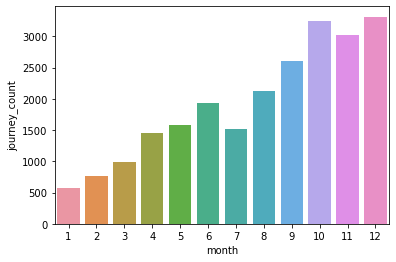

In [124]:
ax = sns.barplot(x = 'month', y = 'journey_count', data = taxi_mogr)

/Users/ola/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

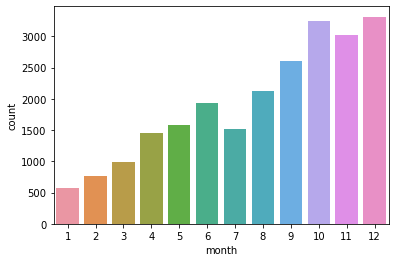

In [125]:
# 2 способ
sns.countplot(taxi.month)

Наименьшее число заказов летом было в 7 месяце

### Задание 13
А теперь – график по дням недели (weekday). Задать порядок столбиков на графике можно с помощью аргумента order, которому нужно передать список названий в нужном порядке. Например: 
sns.countplot(data['column'], order=['One', 'Two', 'Three'])
Вопрос: в какой день недели суммарно поступило меньше всего заказов?

/Users/ola/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weekday', ylabel='count'>

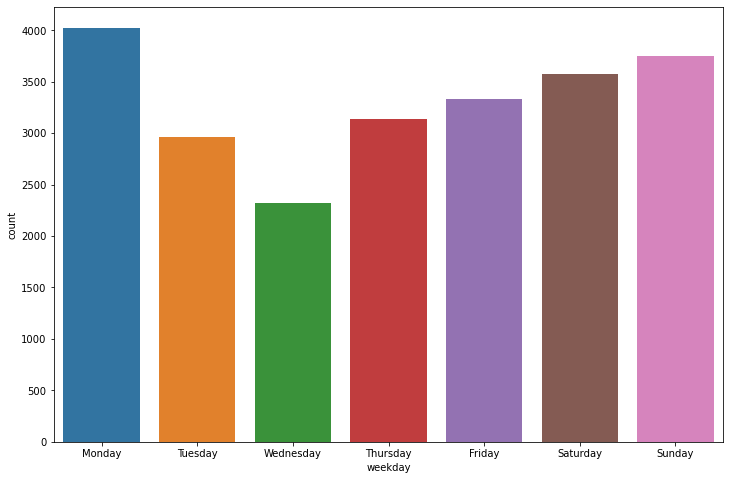

In [133]:
plt.figure(figsize = (12, 8))
sns.countplot(taxi.weekday, order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

В среду суммарно поступило меньше всего заказов

### Задание 14
Также мы можем посмотреть на несколько простых метрик, показывающих число уникальных пользователей за определённый период:

DAU (daily active users) – число уникальных пользователей за день

WAU (weekly active users) – число уникальных пользователей за неделю

MAU (monthly active users) – число уникальных пользователей за месяц

Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени. Постройте график MAU.

Могут пригодиться:
groupby – группировка
nunique – число уникальных значений
plot.line – линейная диаграмма

Заметим, что данные по заказам взяты только за 2010 год:

In [134]:
taxi.sort_values('start_at')

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,month,weekday
12212,1c6b5d467e8159465ccdbb6129244439,81391eb34b4ff58d304e5aa357d4c7df,a4dbb03efa4c2a99bbbb852350f65810,fc308d768d77788c726b74fd5e365e1b,executive,asap,2010-01-01 00:25:00,"-12,10379028","-77,00506592",2010-01-01 01:01:00,...,drop off,"-12,12403028","-76,99065828",2010-01-01 00:39:00,iPhone,NaN,5.0,14.0,1,Friday
12215,1c6b5d467e8159465ccdbb6129848413,9b474537c2b26020bb16aee19acacccf,bb790ea51a0aff0f6d6e11020933c37c,8842ece0c6fb65eb4499f76c51d380b6,executive,asap,2010-01-01 03:49:00,"-12,079989","-77,04745",2010-01-01 04:25:00,...,drop off,"-12,09804264","-77,0480888",2010-01-01 04:07:00,Android,5.0,5.0,18.0,1,Friday
12214,1c6b5d467e8159465ccdbb612983f728,9b474537c2b26020bb16aee19acacccf,a4dbb03efa4c2a99bbbb852350f65810,fc308d768d77788c726b74fd5e365e1b,executive,asap,2010-01-01 05:27:00,"-12,106378","-77,025686",2010-01-01 05:56:00,...,drop off,"-12,1116703","-77,00256635",2010-01-01 05:41:00,Android,NaN,5.0,14.0,1,Friday
21566,1c6b5d467e8159465ccdbb612982b31b,9b474537c2b26020bb16aee19acacccf,924d4f0e7554566623e8ebb3902a8b5f,924d4f0e7554566623e8ebb3902a80f1,executive,asap,2010-01-01 09:20:00,"-12,120705","-76,988088",2010-01-01 10:45:00,...,drop off,"-12,13430389","-77,01779243",2010-01-01 09:35:00,Android,5.0,5.0,15.0,1,Friday
12211,1c6b5d467e8159465ccdbb612920727b,3d68e1172f35c1fbd06db5a1bc13b262,bb790ea51a0aff0f6d6e11020933c37c,8842ece0c6fb65eb4499f76c51d380b6,executive,asap,2010-01-01 09:39:00,"-12,13132477","-77,01864624",2010-01-01 10:18:00,...,drop off,"-12,09781799","-77,04828609",2010-01-01 09:58:00,iPhone,5.0,5.0,19.0,1,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21768,29c460e9d44ae084d4631c5adeba892a,fa88b809b28e4387f72703c52ae49bb7,ff5c924e0b630fd7c019a4234059081c,ff5c924e0b630fd7c019a42340591b2c,executive,asap,2010-12-31 20:54:00,"-12,12649918","-77,00308228",2010-12-31 21:23:00,...,drop off,"-12,10899073","-77,00787301",2010-12-31 21:06:00,iPhone,5.0,4.0,12.0,12,Friday
19718,29c460e9d44ae084d4631c5ade06f5b4,a7b047c6a09ccb85e9980d80ffaaba51,ff5c924e0b630fd7c019a4234059081c,ff5c924e0b630fd7c019a42340591b2c,executive,asap,2010-12-31 21:36:00,"-12,1006012","-77,00802612",2010-12-31 21:58:00,...,drop off,"-12,10900703","-77,00787399",2010-12-31 21:41:00,iPhone,5.0,4.0,5.0,12,Friday
21767,29c460e9d44ae084d4631c5adeba2548,3d68e1172f35c1fbd06db5a1bc1425d0,406921adcca37705ef527b4246c0cfea,16cbe35db7fff70fbc8251b4cdcccb70,executive,asap,2010-12-31 22:22:00,"-12,08514909","-76,97773878",2010-12-31 22:49:00,...,drop off,"-12,10906364","-76,97051276",2010-12-31 22:34:00,Android,NaN,5.0,12.0,12,Friday
19713,eb959517b2fb80c1618cea5160c574d7,8040d18580251e7b8b9073260793ecd1,c814db2127582cf95dea1f74f43127c2,16cbe35db7fff70fbc8251b4cdca8eb8,executive,asap,2010-12-31 22:30:00,"-12,0273909","-77,10655589",2010-12-31 22:31:00,...,rider cancel,"-12,06976548","-77,03182832",NaT,Android,NaN,NaN,NaN,12,Friday


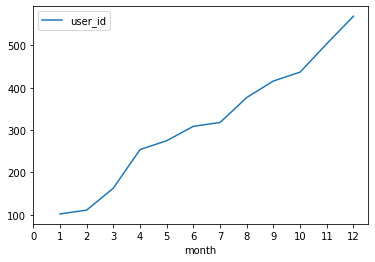

In [153]:
taxi.groupby('month').agg({'user_id': 'nunique'}).plot.line()
plt.xticks(range(13));

В течение всего года число уникальных пользователей увеличивалось

MAU за апрель примерно в 2.5 раза больше, чем за январь